<a href="https://colab.research.google.com/github/Sylvester-Dass/The_Sparks_Foundation_Task-2/blob/main/Task_2_Prediction_using_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author: Sylvester F Dass**

**The Sparks Foundation - Data Science & Business Analytics**

**Task 2: Prediction using Unsupervised ML (Beginner)**

In this task, we are going to predict the optimum number of clusters from the given iris dataset and represent it visually. This includes unsupervised learning.

**Importing required libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

**Step 1 : Reading the data-set**

In [2]:
# Loading and Reading the iris dataset 

data = pd.read_csv('Iris.csv')
print('Data import successfull')

Data import successfull


In [4]:
data.head(10) # loads the first ten rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
data.tail() # loads the last five rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
data.shape

(150, 6)

In [6]:
# Checking for NaN values
# NaN standing for not a number, is a numeric data type used to represent any value that is undefined or unpresentable
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
# Checking statistical description
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
print(data.Species.nunique())
print(data.Species.value_counts())

3
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


**Step 2: Data Visualization**

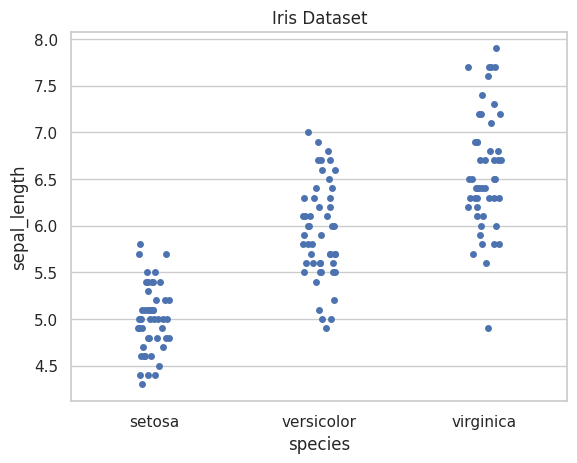

In [10]:
sns.set(style = 'whitegrid')
iris = sns.load_dataset('iris');
ax = sns.stripplot(x ='species',y = 'sepal_length',data = iris);
plt.title('Iris Dataset')
plt.show()

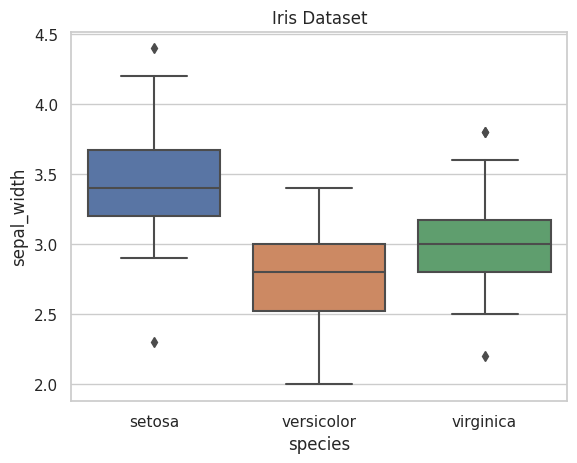

In [11]:
sns.boxplot(x='species',y='sepal_width',data=iris)
plt.title("Iris Dataset")
plt.show()

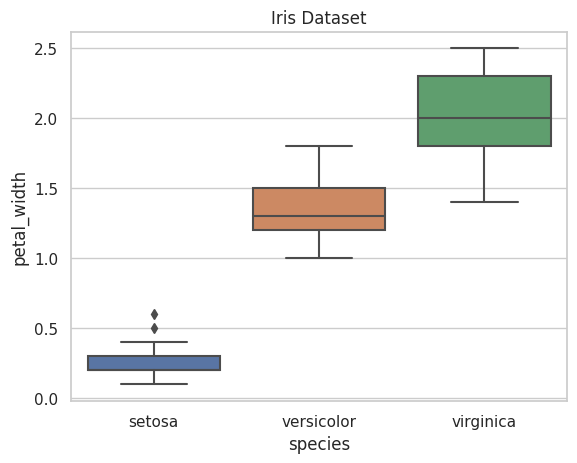

In [13]:
sns.boxplot(x='species',y='petal_width',data=iris)
plt.title("Iris Dataset")
plt.show()

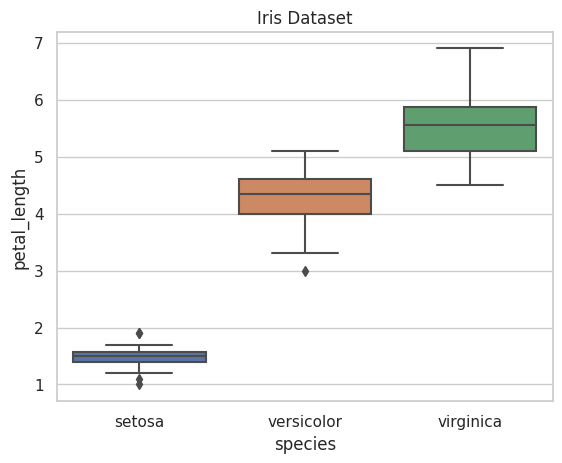

In [14]:
sns.boxplot(x='species',y='petal_length',data=iris)
plt.title("Iris Dataset")
plt.show()

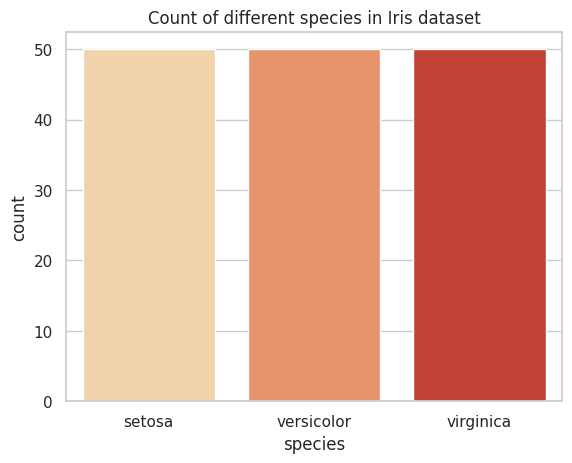

In [15]:
# Count plot
sns.countplot(x='species', data=iris, palette="OrRd")
plt.title("Count of different species in Iris dataset")
plt.show()

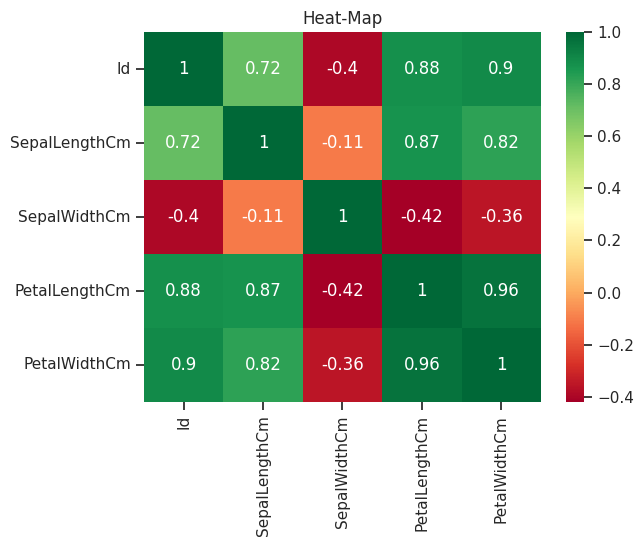

In [25]:
#This is needed for the analysis of two variables, for determining the empirical relationship between them.
sns.heatmap(data.corr(numeric_only = True), annot=True,cmap='RdYlGn')
plt.title("Heat-Map")
plt.show()

<Axes: >

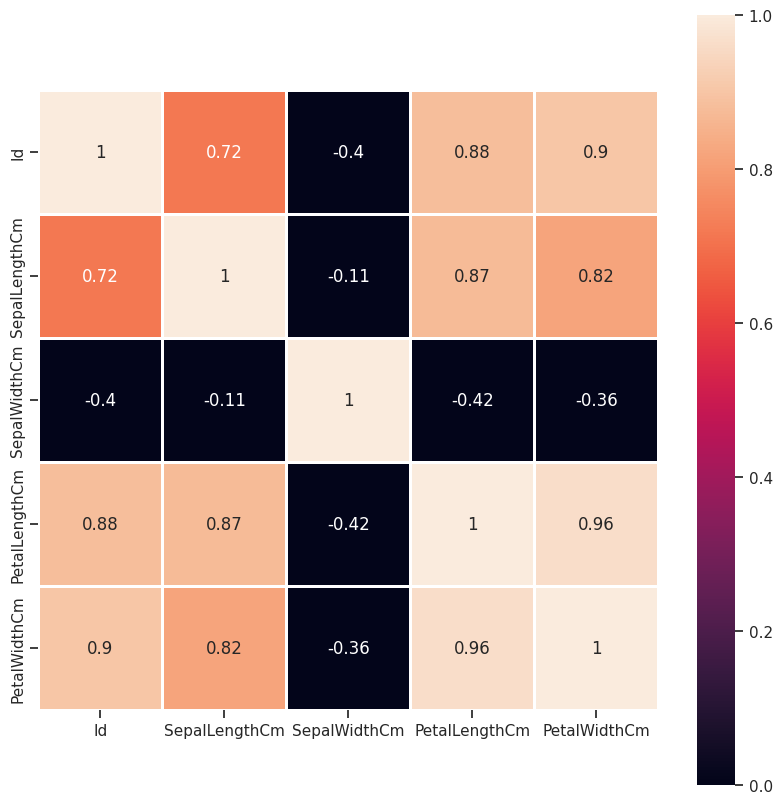

In [26]:
iris1 = data.corr(numeric_only = True) #finding correlation between variables of iris dataset
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(iris1,vmin=0,vmax=1,square=True,annot=True,linewidth=1)

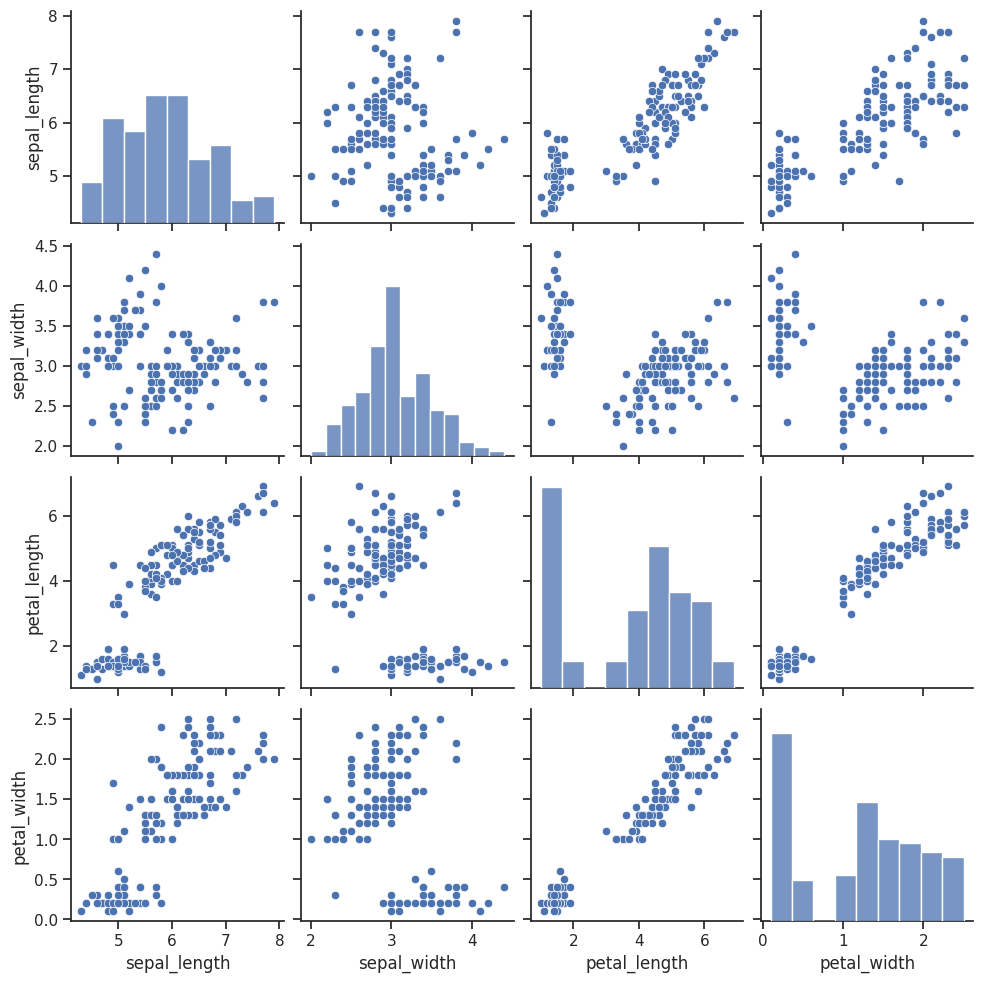

In [18]:
import seaborn as sns

sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
g = sns.pairplot(iris)


import matplotlib.pyplot as plt
plt.show()

**Step 3 : Finding the optimum number of clusters using k-means clustering**

In [19]:
# Finding the optimum number of clusters using k-means

x = data.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    ## appending the WCSS to the list (kmeans.inertia_ returns the WCSS value for an initialized cluster)
    wcss.append(kmeans.inertia_) 
    print('k:',i ,"wcss:",kmeans.inertia_)

k: 1 wcss: 281831.5446666667
k: 2 wcss: 70581.38080000003
k: 3 wcss: 31320.71120000001
k: 4 wcss: 17758.792503556186
k: 5 wcss: 11468.96874702381
k: 6 wcss: 7921.8634730769245
k: 7 wcss: 5911.632365518541
k: 8 wcss: 4541.979023391813
k: 9 wcss: 3571.9110955882347
k: 10 wcss: 2943.933100840336


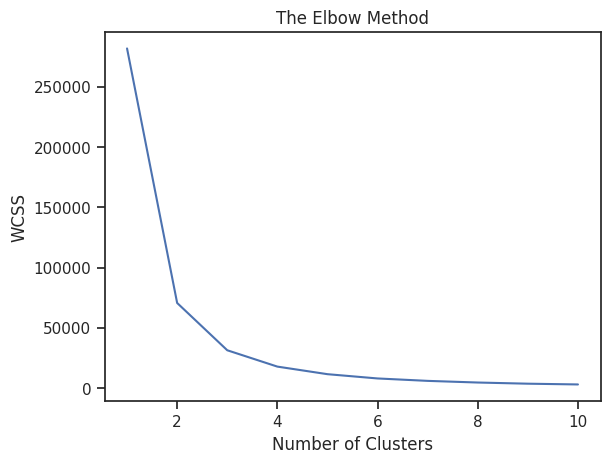

In [20]:
# Plotting the results onto a line graph, allowing us to observe 'The elbow'

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

We can see that after 3 the drop in WCSS is minimal. So we choose 3 as the optimal number of clusters.

**Step 4 : Initializing K-Means With Optimum Number Of Clusters**

In [21]:
# Fitting K-Means to the Dataset 
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)

# Returns a label for each data point based on the number of clusters
y_kmeans = kmeans.fit_predict(x)

**Step 5 : Predicting Values**

In [22]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

**Step 6 : Visualizing the Clusters**

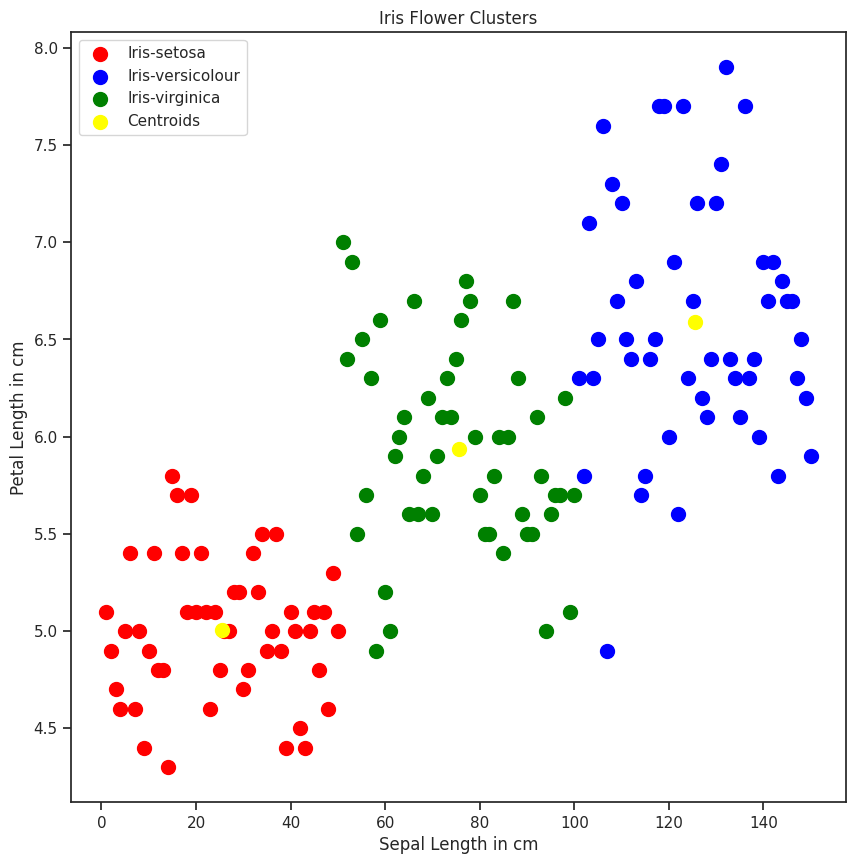

In [23]:
# Visualising the clusters
plt.figure(figsize=(10,10))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Iris-versicolour')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.title('Iris Flower Clusters')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Petal Length in cm')
plt.legend()
plt.show()